In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

In [12]:
data = pd.read_csv("C:\\Users\\Orlanndo\\Desktop\\PROGRAMAS\\python\\Ejercicio 1 Regresion lineal\\Regresion.csv")

In [13]:
data.head(30)

,P,A
0,68.78,162
1,74.11,212
2,71.73,220
3,69.88,206
4,67.25,152
5,68.78,183
6,68.34,167
7,67.01,175
8,63.45,156
9,71.19,186


In [14]:
lm = smf.ols(formula="A~P",data = data).fit()

In [15]:
lm

In [16]:
lm.params

Intercept   -218.524873
P              5.813661
dtype: float64

Modelo lineal predictivo :
* A = -218.524873 + 5.813661 * P

In [17]:
lm.pvalues

Intercept    7.469820e-04
P            1.576033e-07
dtype: float64

In [18]:
lm.rsquared

0.6314262963192161

In [19]:
lm.rsquared_adj

0.618262949759188

In [20]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      A   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     47.97
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           1.58e-07
Time:                        15:58:10   Log-Likelihood:                -115.73
No. Observations:                  30   AIC:                             235.5
Df Residuals:                      28   BIC:                             238.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -218.5249     57.745     -3.784      0.001    -336.811    -100.239
P              5.8137      0.839      6.926      0.000       4.094       7.533
==============================================================================
Omnibus:                        0.216   Durbin-Watson:                   2.216
Prob(Omnibus):                  0.898   Jarque-Bera (JB):                0.203
Skew:                          -0.165   Prob(JB):                        0.903
Kurtosis:                       2.769   Cond. No.                     1.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
A_pred = lm.predict(pd.DataFrame(data["P"]))
A_pred

0     181.338749
1     212.325564
2     198.489050
3     187.733777
4     172.443848
5     181.338749
6     178.780738
7     171.048569
8     150.351935
9     195.349673
10    172.095028
11    164.014039
12    155.293547
13    176.629684
14    201.105198
15    160.932798
16    165.700001
17    173.955400
18    189.012782
19    178.257509
20    176.164591
21    177.618006
22    183.082848
23    204.709668
24    173.432170
25    179.652788
26    180.350427
27    211.860471
28    197.268181
29    183.664214
dtype: float64

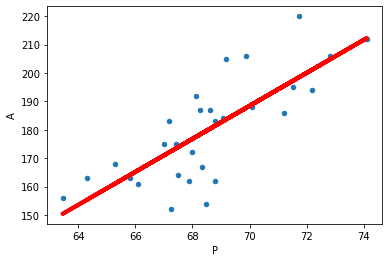

In [25]:
data.plot(kind = "scatter" ,x ="P", y="A")
plt.plot(pd.DataFrame(data["P"]), A_pred,C="red", linewidth=4)

In [26]:
data["A_pred"] = -218.524873 + 5.813661 * data["P"]

In [27]:
data["RSE"] = (data["A"] - data["A_pred"])**2

In [28]:
SSD = sum(data["RSE"])
SSD

3939.85631971621

In [29]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

11.862088950753106

In [30]:
len(data)

30

In [31]:
A_m = np.mean(data["A"])
A_m

181.13333333333333

In [32]:
RSE/A_m

0.06548816130338483

(array([1., 2., 2., 3., 3., 8., 4., 3., 1., 3.]),
 array([-25.65276889, -20.93639505, -16.22002122, -11.50364738,
         -6.78727355,  -2.07089971,   2.64547413,   7.36184796,
         12.0782218 ,  16.79459563,  21.51096947]),
 <a list of 10 Patch objects>)

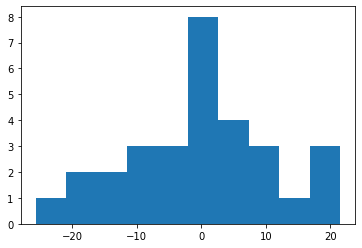

In [34]:
plt.hist((data["A"] - data["A_pred"]))